# $B1$: Generate State $e^{i\theta} |0\rangle$

## Problem Statement  

You are given a real number $ \theta $. Implement the operation of preparing the quantum state $ |\psi\rangle $ from the zero state on a quantum circuit $ qc $ with **one qubit**.  

The quantum state $ |\psi\rangle $ is defined as:  

$$
|\psi\rangle = e^{i\theta} |0\rangle.
$$

## Constraints  

- $0 \leq \theta < 2\pi$  
- In this problem, a state with a different global phase will **not** be considered correct.  

In [9]:
from qiskit import QuantumCircuit


def solve(theta: float) -> QuantumCircuit:
    qc = QuantumCircuit(1)
    
    qc.x(0)
    qc.p(qubit=0, theta=theta)
    qc.x(0)

    return qc

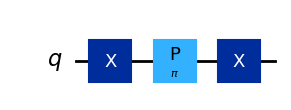

In [10]:
import numpy as np
qc = solve(np.pi)

qc.draw('mpl')

In [11]:
from qiskit.quantum_info import Statevector

statevector = Statevector(qc)

statevector.draw('latex')

<IPython.core.display.Latex object>

## Solution Approach  

To generate the quantum state  

$$
|\psi\rangle = e^{i\theta} |0\rangle,
$$  

we need to apply a phase factor of $ e^{i\theta} $ to the $ |0\rangle $ state. In Qiskit, this can be achieved using the phase gate $ P(\theta) $. However, directly applying $ P(\theta) $ on $ |0\rangle $ has no effect because phase gates only modify the $ |1\rangle $ component of a superposition.  

### Steps to Implement  

1. **Initialize the Circuit:**  
   - Create a quantum circuit with **one qubit**.  

2. **Apply an X Gate:**  
   - The X gate flips the qubit from $ |0\rangle $ to $ |1\rangle $.  
   - This allows us to apply the phase gate effectively.  

3. **Apply the Phase Gate $ P(\theta) $:**  
   - The phase gate $ P(\theta) $ applies a phase factor $ e^{i\theta} $ to the $ |1\rangle $ state.  
   - Since the qubit is currently in $ |1\rangle $, this effectively adds the phase.  

4. **Apply Another X Gate:**  
   - The second X gate flips the qubit back to $ |0\rangle $.  
   - This transfers the acquired phase to the $ |0\rangle $ state, resulting in the desired state $ e^{i\theta} |0\rangle $.  

### Correctness  

- The approach ensures that the **global phase is correctly applied**, which is crucial since states with different global phases are considered incorrect in this problem.  
- The use of X gates allows us to manipulate the phase of the $ |0\rangle $ state indirectly.  

Thus, this implementation correctly prepares the required quantum state.
